Importing all the necessary libraries for data preparation, analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Data Preparation**

In [2]:
df = pd.read_csv('./master.csv')
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
pd.isnull(df).any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

### I decided to drop both 'HDI for year' and 'country-year'. For 'HDI for year', since I observed that most values are NaN and it wouldn't really add anything to my analysis in the end. For 'country-year', it was redundant data since there already is a column for 'country' and 'year'.

In [4]:
df.drop(columns=['HDI for year', 'country-year'], inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### I rename each column to a continuous string, so that I can access it more easily when going to the data analysis portion. I didn't see any other problem with the formatting for the actual data in each column, so I did not make any formatting changes to them. At this point, there are no more null values in the dataframe.

In [5]:
df.rename(columns={
    'suicides/100k pop':'suicides/100k_pop',
    ' gdp_for_year ($) ':'gdp_for_year($)',
    'gdp_per_capita ($)':'gdp_per_capita($)'
    }, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_for_year($),gdp_per_capita($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### Since it was stated in the Tidy Tuesday ppt provided, I focused mainly on the data of Albania. I also chose to do this since, the other countries involved had a lot of missing information for the other columns. This is also to reduce the scope of this data analysis and exploration.

### I chose to remove the years of 2005, 2006, and 2009 since it showed that there were zero suicides that happened during those years. This might be an oversight by me, but it seems off to think that is possible.

In [6]:
df = df[(df['country'] == 'Albania') & (df['year'] != 2005) & (df['year'] != 2006) & (df['year'] != 2009)]

df.sample(10).sort_index()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_for_year($),gdp_per_capita($),generation
16,Albania,1988,male,55-74 years,4,140200,2.85,"2,126,000,000",769,G.I. Generation
34,Albania,1989,female,75+ years,0,37000,0.00,"2,335,124,988",833,G.I. Generation
39,Albania,1992,male,25-34 years,7,245500,2.85,"709,452,584",251,Boomers
100,Albania,1997,female,15-24 years,21,294000,7.14,"2,359,903,108",793,Generation X
114,Albania,1998,female,25-34 years,10,275300,3.63,"2,707,123,772",899,Generation X
134,Albania,2000,female,75+ years,2,37800,5.29,"3,632,043,908",1299,G.I. Generation
142,Albania,2000,female,5-14 years,0,324700,0.00,"3,632,043,908",1299,Millenials
161,Albania,2002,female,15-24 years,14,275970,5.07,"4,435,078,648",1573,Millenials
225,Albania,2007,female,35-54 years,14,391811,3.57,"10,701,011,897",3863,Boomers
235,Albania,2008,male,75+ years,2,44574,4.49,"12,881,352,688",4672,Silent


# **Data Analysis & Data Visualization** 

### Here we can see the total number of suicides that occured in each year

Text(0.5, 1.0, '# of Suicides per Year')

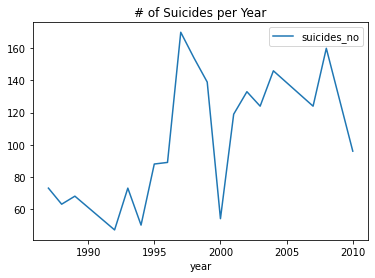

In [78]:
suicides_per_year = df.groupby('year').suicides_no.sum().reset_index()
ax = suicides_per_year.plot(x='year', y='suicides_no', kind="line")
ax.set_title("# of Suicides per Year")

### This shows the total number of suicides for male and female

Text(0.5, 1.0, 'Total # of suicides per sex')

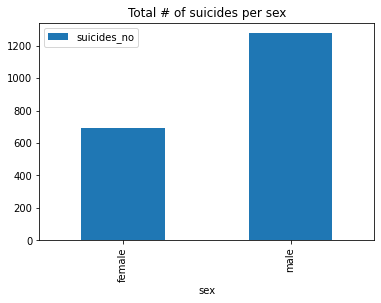

In [81]:
suicides_per_sex = df.groupby('sex').suicides_no.sum().reset_index()
ax = suicides_per_sex.plot(x='sex', kind='bar')
ax.set_title('Total # of suicides per sex')

### This shows the total number of suicides for each age range that was given in the dataset

Text(0.5, 1.0, '# of deaths per age range')

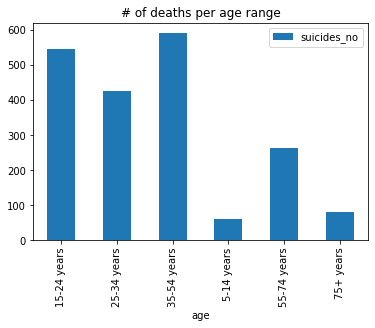

In [96]:
suicide_per_age = df.groupby('age').suicides_no.sum().reset_index()
ax = suicide_per_age.plot(x='age', y='suicides_no', kind='bar')
ax.set_title('# of deaths per age range')

### Below are the female and male populations separated by year

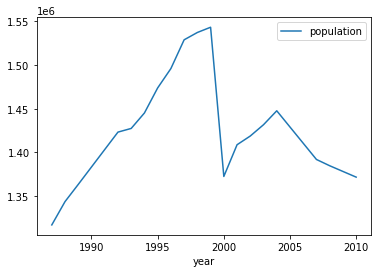

In [97]:
fpop_per_year = df[df['sex'] == 'female'].groupby(['year']).population.sum().reset_index()
ax = fpop_per_year.plot(x='year', y='population')
ax.set_title('Female population by year')

Text(0.5, 1.0, 'Male population by year')

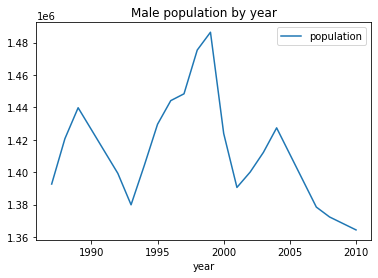

In [98]:
mpop_per_year = df[df['sex'] == 'male'].groupby(['year']).population.sum().reset_index()
ax = mpop_per_year.plot(x='year', y='population')
ax.set_title('Male population by year')

### Lastly, we can see the gdp for each year alongside the total number of suicides per year

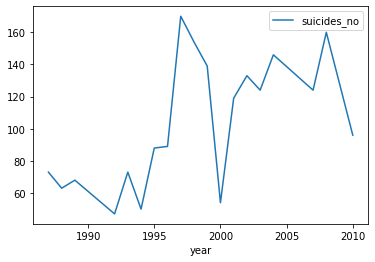

In [111]:

grp = df.groupby(['year', 'gdp_for_year($)']).suicides_no.sum().reset_index()
ax =  grp.plot(x='year', y=['gdp_for_year($)', 'suicides_no'])